In [1]:
import numpy as np
from datetime import datetime
import pandas as pd 
import time
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import json
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
import xgboost as xgb
from sklearn import metrics
from  sklearn.datasets  import  make_hastie_10_2
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import TimeSeriesSplit  
from sklearn.preprocessing import StandardScaler    

### generate y

In [8]:
# read josn, stock close price
df = pd.read_json("data_store/stock_close_price.json",encoding="utf-8")
df.index = df.index.astype("str")
df

,600016.XSHG,600030.XSHG,601633.XSHG,601788.XSHG,600739.XSHG,603288.XSHG,601018.XSHG,600176.XSHG,600309.XSHG,601336.XSHG,...,000002.XSHE,000001.XSHE,000825.XSHE,603806.XSHG,600482.XSHG,600352.XSHG,000063.XSHE,002294.XSHE,601992.XSHG,600547.XSHG
2016-01-04,5.87,15.45,9.46,18.88,19.79,19.63,7.34,5.73,11.99,42.48,...,19.13,8.72,3.42,18.84,41.36,9.41,16.46,24.95,3.87,9.87
2016-01-05,5.92,15.62,9.67,19.08,19.10,19.94,7.34,5.84,11.95,43.44,...,19.13,8.77,3.63,18.22,39.45,9.33,16.75,25.22,3.84,10.49
2016-01-06,5.94,15.87,9.85,19.33,19.52,19.89,7.34,5.97,12.30,43.49,...,19.13,8.87,3.94,18.63,40.60,9.52,16.90,25.64,4.05,10.97
2016-01-07,5.59,14.46,9.05,17.41,17.57,18.40,7.34,5.40,11.51,39.38,...,19.13,8.42,3.55,16.78,36.54,8.65,15.35,24.09,3.65,10.58
2016-01-08,5.65,14.90,9.20,17.81,18.08,18.58,7.34,5.67,11.85,41.02,...,19.13,8.56,3.91,16.71,38.37,8.96,15.78,24.65,3.83,11.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-24,3.91,26.04,54.14,15.83,24.15,100.74,4.12,19.27,104.73,40.57,...,20.32,17.35,11.46,121.30,20.61,14.46,34.47,28.56,2.97,19.37
2021-09-27,3.88,25.65,53.28,15.69,23.78,106.63,4.03,18.21,103.15,41.04,...,19.81,17.57,10.81,126.48,18.96,13.77,34.66,29.37,2.84,18.95
2021-09-28,3.91,25.86,51.28,15.79,24.26,107.67,4.04,18.20,105.85,41.28,...,21.08,17.97,10.70,122.09,18.70,13.78,34.20,29.03,2.86,18.99
2021-09-29,3.93,25.61,51.19,15.50,23.21,109.75,3.95,17.50,106.21,41.17,...,21.17,18.15,9.88,123.18,18.06,13.39,32.65,29.38,2.85,19.95


In [4]:
# get the trade date
data_list = df.index.tolist()

In [5]:
# change the first row to the column
def change_df_column(df):
    arr=df.values
    new_df = pd.DataFrame(arr[1:,1:], index=arr[1:,0], columns=arr[0,1:])
    new_df.index.name = arr[0,0]
    return new_df

In [6]:
# class to 6 
def y_classify_6(series):
    if  series > 6:
        return 6
    elif series > 2 and series <= 6:
        return 5
    elif series >= 0 and series <= 2:
        return 4
    elif series > -2 and series < 0:
        return 3
    elif series > -6 and series <= -2:
        return 2
    elif series < -6:
        return 1

In [7]:
# use stack func to reshape the df
df_2 = df.stack().reset_index()
df_2.columns = ["date","code","close_0"]
# sort by (code,date)
df_2 = df_2.sort_values(by = ["code","date"],ascending = True).reset_index(drop=True)
# add close 1 and close 5
se_close_1 = df_2.groupby(['code'])[['close_0']].shift(-1)['close_0']
df_2["close_1"] = se_close_1
se_close_5 = df_2.groupby(['code'])[['close_0']].shift(-5)['close_0']
df_2["close_5"] = se_close_5
print(len(df_2))
df_2.head(10)

419989


,date,code,close_0,close_1,close_5
0,2016-01-04,000001.XSHE,8.72,8.77,8.28
1,2016-01-05,000001.XSHE,8.77,8.87,8.32
2,2016-01-06,000001.XSHE,8.87,8.42,8.24
3,2016-01-07,000001.XSHE,8.42,8.56,8.29
4,2016-01-08,000001.XSHE,8.56,8.28,8.05
5,2016-01-11,000001.XSHE,8.28,8.32,8.01
6,2016-01-12,000001.XSHE,8.32,8.24,8.24
7,2016-01-13,000001.XSHE,8.24,8.29,8.11
8,2016-01-14,000001.XSHE,8.29,8.05,7.94
9,2016-01-15,000001.XSHE,8.05,8.01,8.00


In [8]:
# generate y
df_3 = df_2.copy()
# delete na
df_3 = df_3.dropna()
df_3["change_5"] = (df_3["close_5"] - df_3["close_1"])/df_3["close_1"] * 100
df_3["change_5_class6"] = df_3.apply(lambda x:y_classify_6(x["change_5"]),axis = 1)
df_3

,date,code,close_0,close_1,close_5,change_5,change_5_class6
0,2016-01-04,000001.XSHE,8.72,8.77,8.28,-5.587229,2
1,2016-01-05,000001.XSHE,8.77,8.87,8.32,-6.200676,1
2,2016-01-06,000001.XSHE,8.87,8.42,8.24,-2.137767,2
3,2016-01-07,000001.XSHE,8.42,8.56,8.29,-3.154206,2
4,2016-01-08,000001.XSHE,8.56,8.28,8.05,-2.777778,2
...,...,...,...,...,...,...,...
419979,2021-09-15,603993.XSHG,7.88,7.59,6.82,-10.144928,1
419980,2021-09-16,603993.XSHG,7.59,7.28,6.25,-14.148352,1
419981,2021-09-17,603993.XSHG,7.28,7.17,6.24,-12.970711,1
419982,2021-09-22,603993.XSHG,7.17,7.13,5.90,-17.251052,1


<AxesSubplot:>

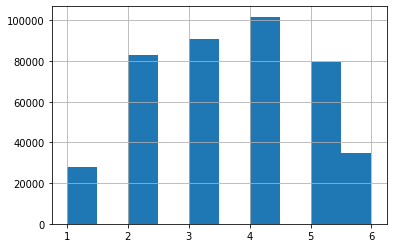

In [9]:
# see the distribution
df_3["change_5_class6"].hist()

In [10]:
# store
df_3.to_json("data_store/y.json")